<a href="https://colab.research.google.com/github/juliannadesalle/ECGR-5106-Real-Time-Machine-Learning/blob/main/Homework_2_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [307]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
import csv
import pandas as pd

#Get Housing details 
housing = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Colab Files - Load/Homework 1 P3/Housing.csv'))
torch.set_printoptions(edgeitems=2, linewidth=75)
#Get the parameters we want to look at within the data set
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
Newtrain = housing[num_vars]
Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [308]:
#define each of the tensors associated with the different specifications of the houses
#normalize the data from the spreadsheet inorder to get usable values for out model
t_c = torch.tensor(Newtrain['price'], dtype = torch.float)
t_c_mean = torch.mean(t_c, dim=0)
t_c_var = torch.var(t_c, dim=0)
t_c =  (t_c - t_c_mean) / torch.sqrt(t_c_var)

#normalize the data from the spreadsheet inorder to get usable values for out model
t_ua = torch.tensor(Newtrain['area'], dtype = torch.float)
t_ua_mean = torch.mean(t_ua, dim=0)
t_ua_var = torch.var(t_ua, dim=0)
t_ua =  (t_ua - t_ua_mean) / torch.sqrt(t_ua_var)
#t_ua = t_ua * 0.1
t_ua = t_ua

#normalize the data from the spreadsheet inorder to get usable values for out model
t_ubt = torch.tensor(Newtrain['bathrooms'], dtype = torch.float)
t_ubt_mean = torch.mean(t_ubt, dim=0)
t_ubt_var = torch.var(t_ubt, dim=0)
t_ubt =  (t_ubt - t_ubt_mean) / torch.sqrt(t_ubt_var)

#normalize the data from the spreadsheet inorder to get usable values for out model
t_us = torch.tensor(Newtrain['stories'], dtype = torch.float)
t_us_mean = torch.mean(t_us, dim=0)
t_us_var = torch.var(t_us, dim=0)
t_us =  (t_us - t_us_mean) / torch.sqrt(t_us_var)

#normalize the data from the spreadsheet inorder to get usable values for out model
t_up = torch.tensor(Newtrain['parking'], dtype = torch.float)
t_up_mean = torch.mean(t_up, dim=0)
t_up_var = torch.var(t_up, dim=0)
t_up =  (t_up - t_up_mean) / torch.sqrt(t_up_var)

#normalize the data from the spreadsheet inorder to get usable values for out model
t_ubd = torch.tensor(Newtrain['bedrooms'], dtype = torch.float)
t_ubd_mean = torch.mean(t_ubd, dim=0)
t_ubd_var = torch.var(t_ubd, dim=0)
t_ubd =  (t_ubd - t_ubd_mean) / torch.sqrt(t_ubd_var)

#t_c = price 
t_c = torch.tensor(t_c).unsqueeze(1) # <1>

#t_ua = area
t_ua = torch.tensor(t_ua).unsqueeze(1) # <1>

#t_ubt = bathrooms
t_ubt = torch.tensor(t_ubt).unsqueeze(1) # <1>

#t_us = stories
t_us = torch.tensor(t_us).unsqueeze(1) # <1>

#t_up = parking
t_up = torch.tensor(t_up).unsqueeze(1) # <1>

#t_ubd = bedrooms
t_ubd = torch.tensor(t_ubd).unsqueeze(1) # <1>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(Tru

In [309]:
#shuffling the elements of a tensor amounts to finding a permutation of its indices 
n_samples = t_ua.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([308, 151,   2, 289, 513, 135, 530, 292, 153, 529, 193, 351, 190,
         219, 216, 203, 112,  57, 508, 544, 372, 441, 440, 228, 501, 427,
         269, 132, 262, 204,  69, 335, 282, 113,  52, 428, 378,  63,  10,
         412, 444, 293, 181, 456, 471, 452, 311, 468, 448, 408, 504, 521,
          54, 115,  93, 150, 144, 199, 370, 201, 111, 442, 496, 443, 377,
         520, 140, 527, 142, 541, 393, 453,  20, 296, 273, 278, 241, 192,
         166, 430, 414,  81,  38, 232,  12, 423, 245, 383, 106, 250,   0,
         462, 411, 221, 473, 248, 342, 128, 502,  23,   4,  64, 433, 265,
         260, 436, 447, 214,  42, 162, 222, 277, 103, 457, 324, 531, 169,
         330, 172, 366, 497, 475, 268, 186, 314, 168, 337, 105,  47, 355,
          37,  82, 215, 346, 146, 353, 491, 284, 437, 343, 133, 331,  95,
         233,  29, 396, 505, 315,  19, 121,  65, 509, 478, 522,  94, 543,
         419,  21, 124, 362,  55, 539, 358, 416, 326, 375, 511, 305, 197,
         157, 119, 507, 368, 303, 281,

In [310]:
#Get index tensors to build training set
t_ua_train = t_ua[train_indices]
t_c_train = t_c[train_indices]
t_ubt_train = t_ubt[train_indices]
t_us_train = t_us[train_indices]
t_up_train = t_up[train_indices]
t_ubd_train = t_ubd[train_indices]

#get index tensors to build validation set 
t_ua_val = t_ua[val_indices]
t_c_val = t_c[val_indices]
t_ubt_val = t_ubt[val_indices]
t_us_val = t_us[val_indices]
t_up_val = t_up[val_indices]
t_ubd_val = t_ubd[val_indices]

#normlaize data 
t_uan_train = 0.1 * t_ua_train
t_uan_val = 0.1 * t_ua_val
t_ubt_train = 0.1 * t_ubt_train
t_ubt_val = 0.1 * t_ubt_val
t_us_train = 0.1 * t_us_train
t_us_val = 0.1 * t_us_val
t_up_train = 0.1 * t_up_train
t_up_val = 0.1 *  t_up_val
t_ubd_train = 0.1 * t_ubd_train
t_ubd_val = 0.1 * t_ubd_val



In [311]:
import torch.nn as nn
#using call instead of forward
linear_model = nn.Linear(1, 1) # <1>
linear_model(t_uan_val)

tensor([[0.2427],
        [0.2751],
        [0.4011],
        [0.4098],
        [0.3694],
        [0.3553],
        [0.3567],
        [0.4062],
        [0.2930],
        [0.3200],
        [0.4098],
        [0.3963],
        [0.3954],
        [0.3775],
        [0.3038],
        [0.3990],
        [0.4026],
        [0.4044],
        [0.2999],
        [0.3844],
        [0.3204],
        [0.3092],
        [0.3016],
        [0.2756],
        [0.2796],
        [0.3350],
        [0.2984],
        [0.3888],
        [0.3820],
        [0.3799],
        [0.3200],
        [0.3477],
        [0.2778],
        [0.3403],
        [0.2948],
        [0.4098],
        [0.3493],
        [0.3693],
        [0.3350],
        [0.3909],
        [0.2853],
        [0.3703],
        [0.4188],
        [0.3859],
        [0.1571],
        [0.3802],
        [0.3811],
        [0.3811],
        [0.2427],
        [0.4412],
        [0.1565],
        [0.3844],
        [0.3454],
        [0.4080],
        [0.3676],
        [0

In [312]:
linear_model.weight

Parameter containing:
tensor([[-0.6497]], requires_grad=True)

In [313]:
linear_model.bias

Parameter containing:
tensor([0.3454], requires_grad=True)

In [314]:
x = torch.ones(8, 1)
linear_model(x)

tensor([[-0.3043],
        [-0.3043],
        [-0.3043],
        [-0.3043],
        [-0.3043],
        [-0.3043],
        [-0.3043],
        [-0.3043]], grad_fn=<AddmmBackward0>)

In [315]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.3043],
        [-0.3043],
        [-0.3043],
        [-0.3043],
        [-0.3043],
        [-0.3043],
        [-0.3043],
        [-0.3043],
        [-0.3043],
        [-0.3043]], grad_fn=<AddmmBackward0>)

In [316]:
linear_model = nn.Linear(8, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)
linear_model.parameters()

<generator object Module.parameters at 0x7f4b9a49e7d0>

In [317]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[ 0.1613,  0.3139, -0.1602, -0.0392,  0.3088, -0.1073,  0.1062,
          -0.2524]], requires_grad=True), Parameter containing:
 tensor([-0.2484], requires_grad=True)]

In [318]:
from numpy.ma.core import absolute
#define the parameters in the training loop
def training_loop(n_epochs, optimizer, model, loss_fn, t_ua_train, t_ua_val,
                  t_c_train, t_c_val, t_ubt_train, t_ubt_val, t_us_train, t_us_val,t_up_train, t_up_val,t_ubd_train, t_ubd_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_ua_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_ua_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 200 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
#define loss calculation
def loss_fn(t_p, t_c):
    squared_diffs = abs(t_p - t_c)**2
    return squared_diffs.mean()
#define linear model
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)
#training loop
training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_ua_train = t_uan_train,
    t_ua_val = t_uan_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val,
    t_ubt_train = t_ubt_train,
    t_ubt_val = t_ubt_val,
    t_us_train = t_us_train,
    t_us_val = t_us_val,
    t_up_train = t_up_train,
    t_up_val = t_up_val,
    t_ubd_train = t_ubd_train,
    t_ubd_val = t_ubd_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 1.1824, Validation loss 1.2318
Epoch 200, Training loss 0.8986, Validation loss 0.8770

Parameter containing:
tensor([[1.0863]], requires_grad=True)
Parameter containing:
tensor([-0.0229], requires_grad=True)


In [319]:
linear_model = nn.Linear(1, 1)

#define optimizer
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

#training loop
training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_ua_train = t_uan_train,
    t_ua_val = t_uan_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val,
    t_ubt_train = t_ubt_train,
    t_ubt_val = t_ubt_val,
    t_us_train = t_us_train,
    t_us_val = t_us_val,
    t_up_train = t_up_train,
    t_up_val = t_up_val,
    t_ubd_train = t_ubd_train,
    t_ubd_val = t_ubd_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 1.4583, Validation loss 1.5259
Epoch 200, Training loss 1.0388, Validation loss 1.0183

Parameter containing:
tensor([[-0.3242]], requires_grad=True)
Parameter containing:
tensor([-0.0254], requires_grad=True)


In [320]:
seq_model = nn.Sequential(
            nn.Linear(1, 8), # <1>
            nn.Tanh(),
            nn.Linear(8, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): Tanh()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [321]:
[param.shape for param in seq_model.parameters()]

[torch.Size([8, 1]), torch.Size([8]), torch.Size([1, 8]), torch.Size([1])]

In [322]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([8, 1])
0.bias torch.Size([8])
2.weight torch.Size([1, 8])
2.bias torch.Size([1])


In [323]:
#hidden layer 
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [324]:
#hidden layer
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [325]:
#hidden layer
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [326]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [327]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.2201], requires_grad=True)

In [328]:
#define optimizer for training 
optimizer = optim.SGD(seq_model.parameters(), lr=1e-2) # <1>

training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_ua_train = t_uan_train,
    t_ua_val = t_uan_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val,
    t_ubt_train = t_ubt_train,
    t_ubt_val = t_ubt_val,
    t_us_train = t_us_train,
    t_us_val = t_us_val,
    t_up_train = t_up_train,
    t_up_val = t_up_val,
    t_ubd_train = t_ubd_train,
    t_ubd_val = t_ubd_val)
    
print('output', seq_model(t_uan_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 1.0099, Validation loss 0.9631
Epoch 200, Training loss 0.9148, Validation loss 0.8925
output tensor([[ 0.1261],
        [ 0.0811],
        [-0.0949],
        [-0.1069],
        [-0.0509],
        [-0.0313],
        [-0.0332],
        [-0.1019],
        [ 0.0559],
        [ 0.0182],
        [-0.1069],
        [-0.0883],
        [-0.0871],
        [-0.0622],
        [ 0.0408],
        [-0.0920],
        [-0.0970],
        [-0.0995],
        [ 0.0463],
        [-0.0717],
        [ 0.0175],
        [ 0.0333],
        [ 0.0440],
        [ 0.0803],
        [ 0.0748],
        [-0.0028],
        [ 0.0484],
        [-0.0780],
        [-0.0684],
        [-0.0655],
        [ 0.0182],
        [-0.0206],
        [ 0.0773],
        [-0.0104],
        [ 0.0534],
        [-0.1069],
        [-0.0229],
        [-0.0508],
        [-0.0028],
        [-0.0809],
        [ 0.0668],
        [-0.0522],
        [-0.1192],
        [-0.0738],
        [ 0.2430],
        [-0.0659],
        [

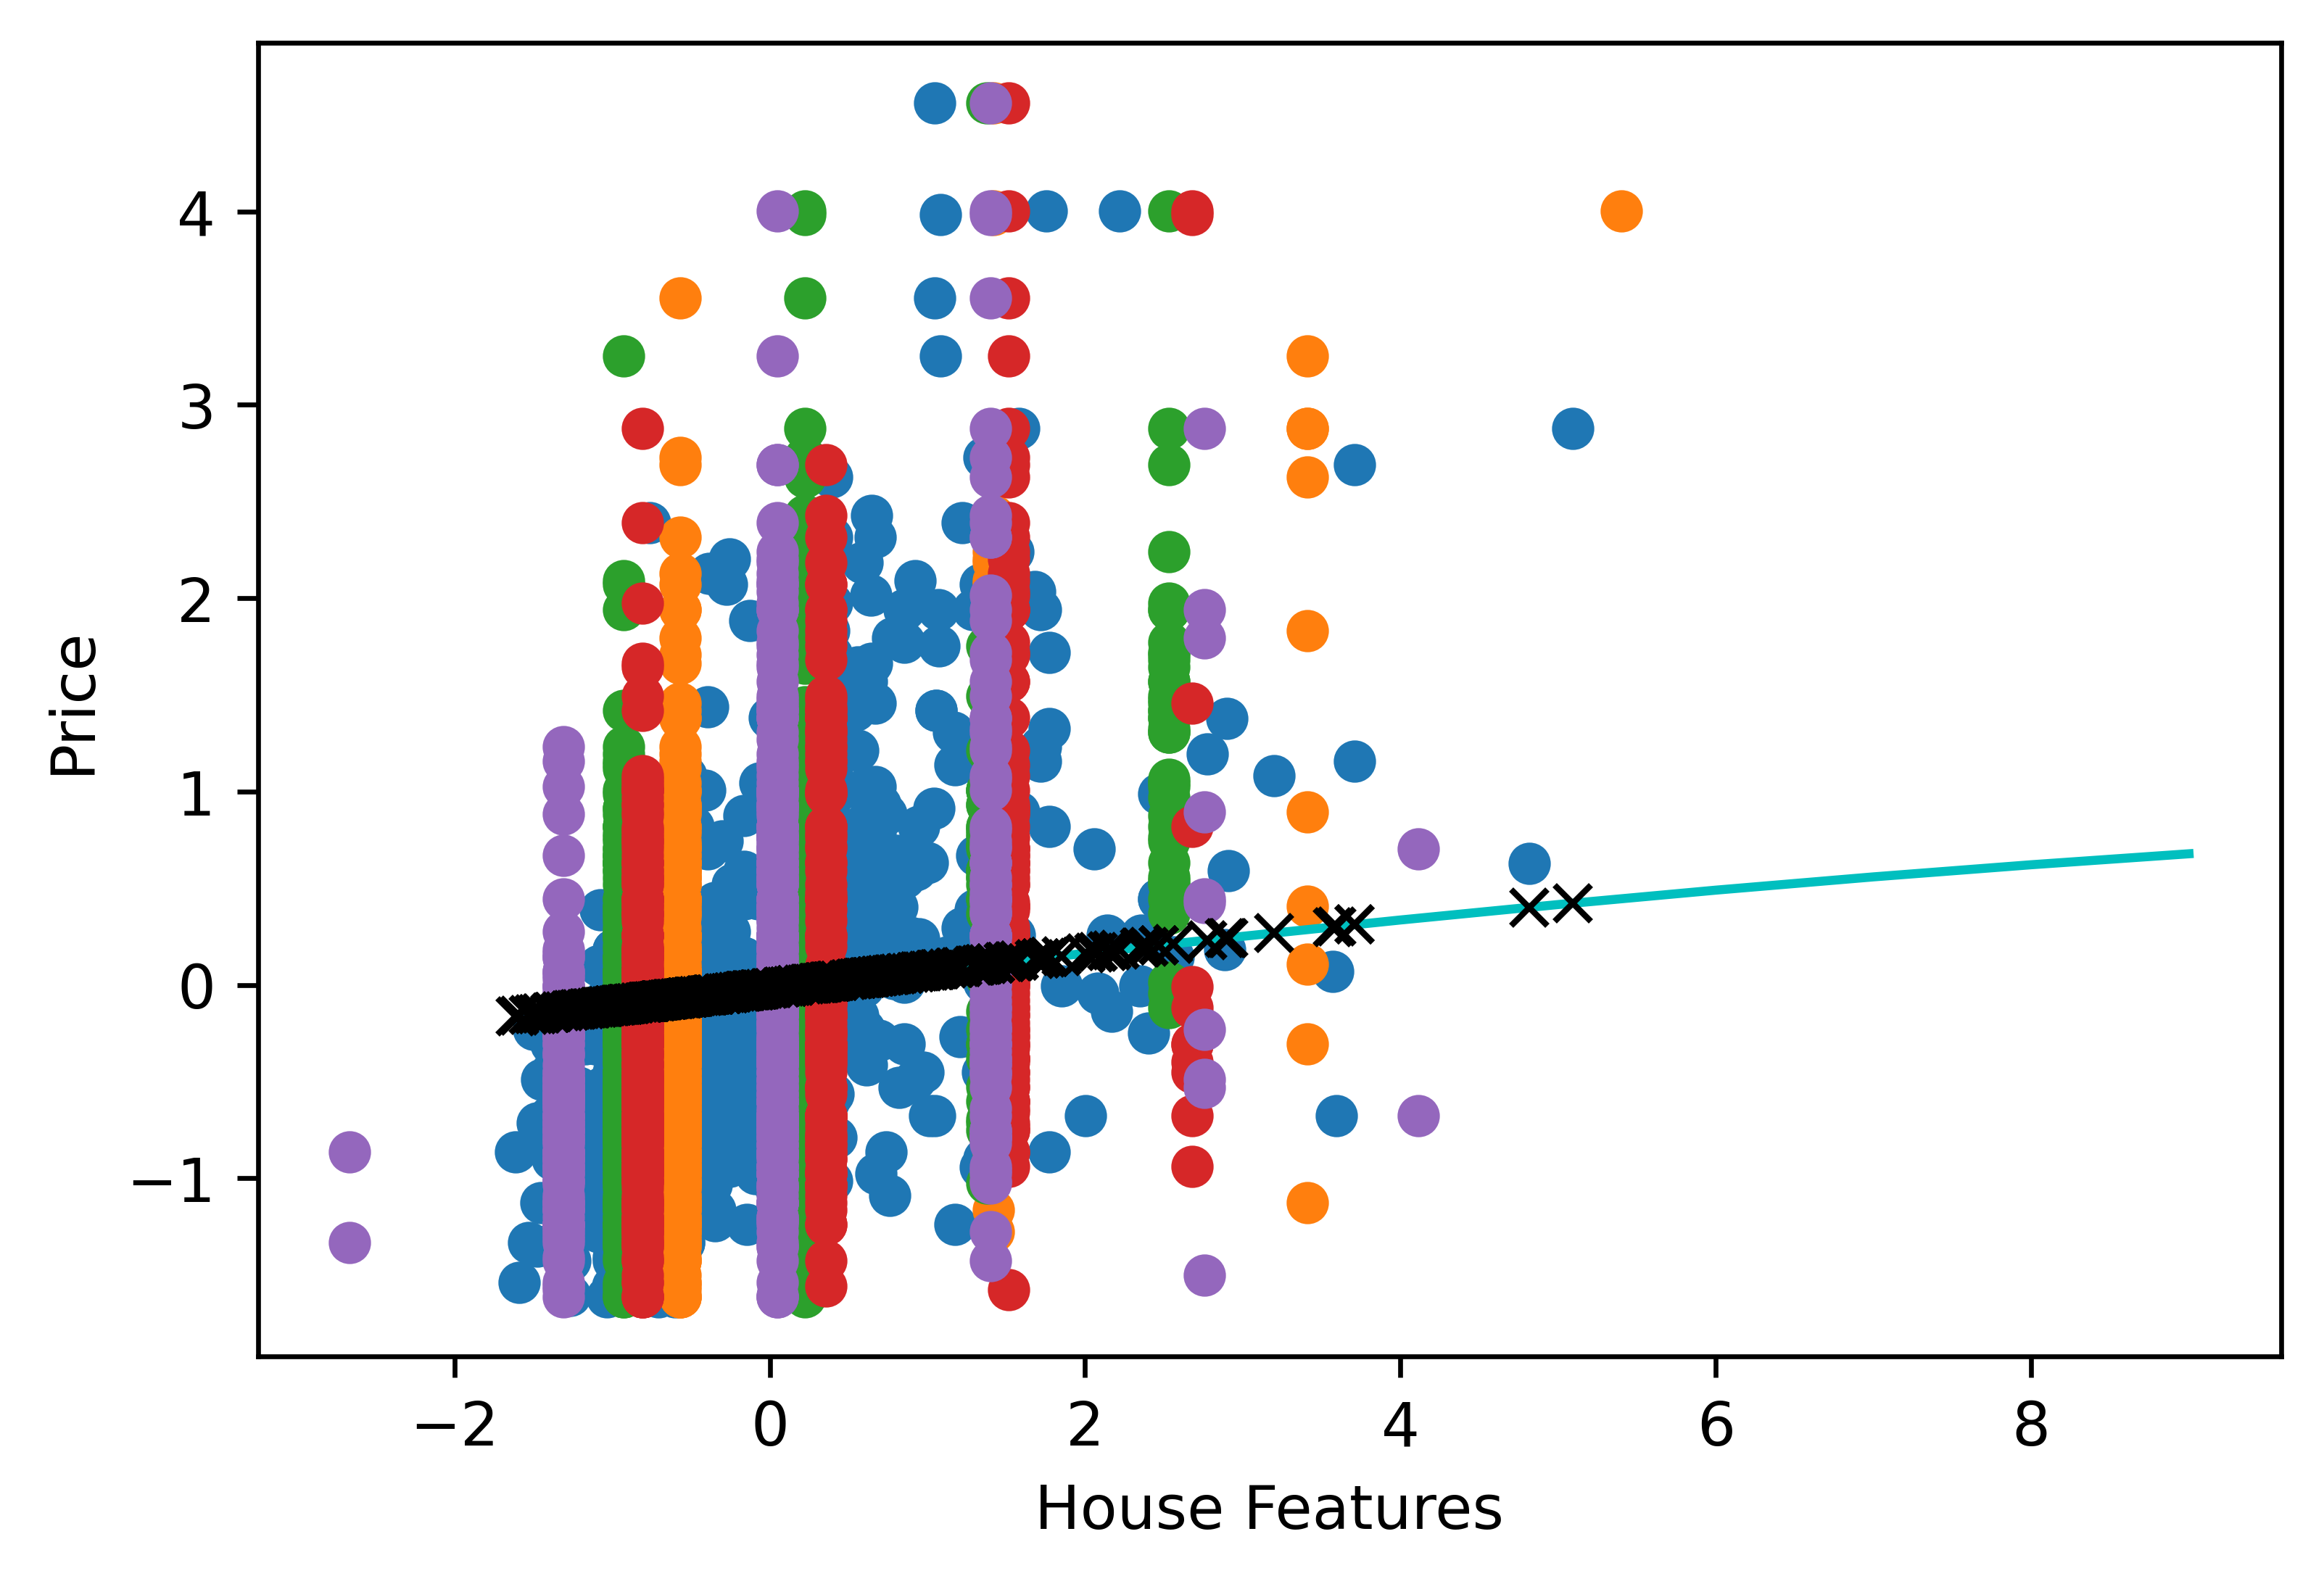

In [329]:


from matplotlib import pyplot as plt

t_range = torch.arange(1., 10.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("House Features")
plt.ylabel("Price")

#blue dots
plt.plot(t_ua.numpy(),  t_c.numpy(), 'o')
plt.plot(t_ubt.numpy(),  t_c.numpy(), 'o')
plt.plot(t_us.numpy(),  t_c.numpy(), 'o')
plt.plot(t_up.numpy(),  t_c.numpy(), 'o')
plt.plot(t_ubd.numpy(), t_c.numpy(),'o')
  
#blue line
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')

#xs 
plt.plot( t_ua.numpy(), seq_model(0.1 * t_ua).detach().numpy(),'kx')



Epoch 1, Training loss 1.2625, Validation loss 1.1741
Epoch 200, Training loss 1.2213, Validation loss 1.1397


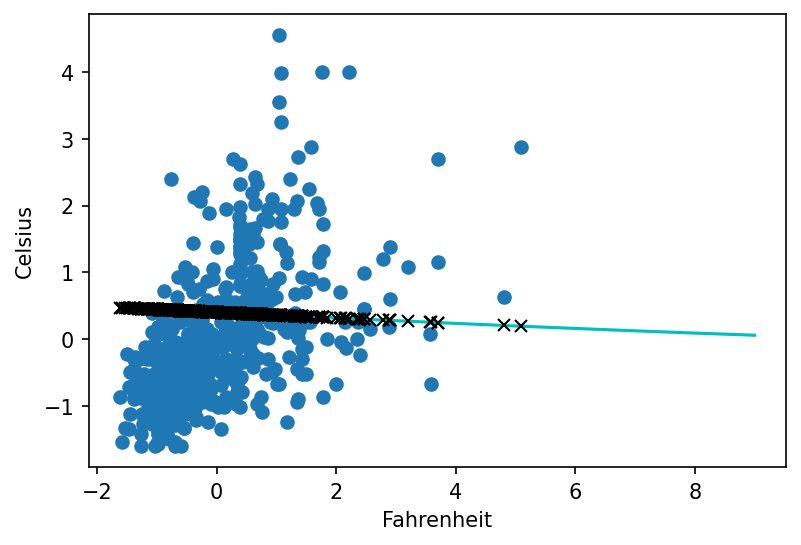

In [330]:


# Exercises here!

neuron_count = 8

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_ua_train = t_uan_train,
    t_ua_val = t_uan_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val,
    t_ubt_train = t_ubt_train,
    t_ubt_val = t_ubt_val,
    t_us_train = t_us_train,
    t_us_val = t_us_val,
    t_up_train = t_up_train,
    t_up_val = t_up_val,
    t_ubd_train = t_ubd_train,
    t_ubd_val = t_ubd_val)

from matplotlib import pyplot as plt

t_range = torch.arange(1., 10.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_ua.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_ua.numpy(), seq_model(0.1 * t_ua).detach().numpy(), 'kx')

